In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [4]:
df = pd.read_csv("X data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.columns = ['tweet', 'sentiment']
df.head()

,tweet,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
sentiment_mapping = {1.0: "Positive", -1.0: "Negative", 0.0: "Neutral"}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [7]:
df.head()

,tweet,sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


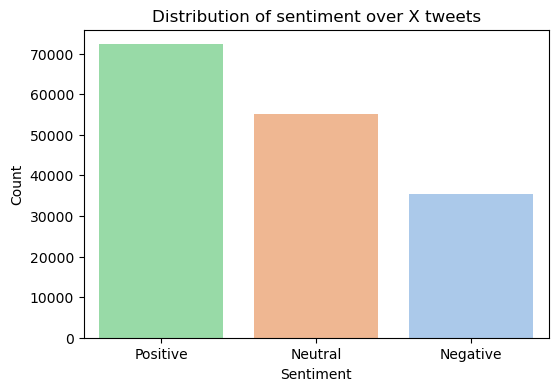

In [20]:
plt.figure(figsize=(6,4 ))
sns.countplot(x=df['sentiment'], palette="pastel", hue=df['sentiment'], legend=False, order=["Positive", "Neutral", "Negative"])
plt.title("Distribution of sentiment over X tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

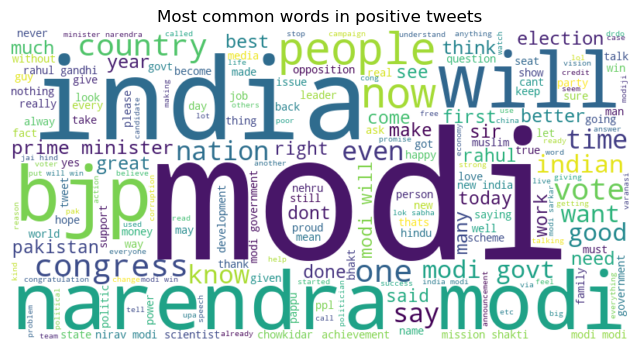

In [22]:
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['tweet'].dropna().astype(str))
wordcloud = WordCloud(height=400, width=800, background_color='white').generate(positive_text)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most common words in positive tweets")
plt.axis("off")
plt.show()

In [24]:
df.tail()

,tweet,sentiment
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral
162979,have you ever listen about like gurukul where ...,Positive


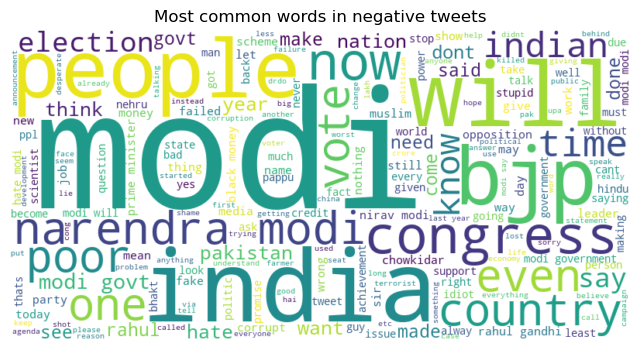

In [28]:
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['tweet'].dropna().astype(str))
wordcloud_n = WordCloud(height=400, width=800, background_color='white').generate(negative_text)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.title("Most common words in negative tweets")
plt.axis('off')
plt.show()

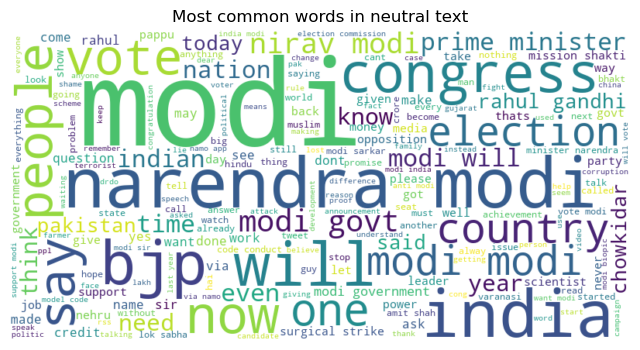

In [29]:
neutral_text = ' '.join(df[df['sentiment'] == 'Neutral']['tweet'].dropna().astype(str))
wordcloud_neutral = WordCloud(height=400, width=800, background_color='white').generate(neutral_text)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Most common words in neutral text")
plt.axis('off')
plt.show()

In [30]:
df.to_csv("final_sentiment_analysis_results.csv", index=False)